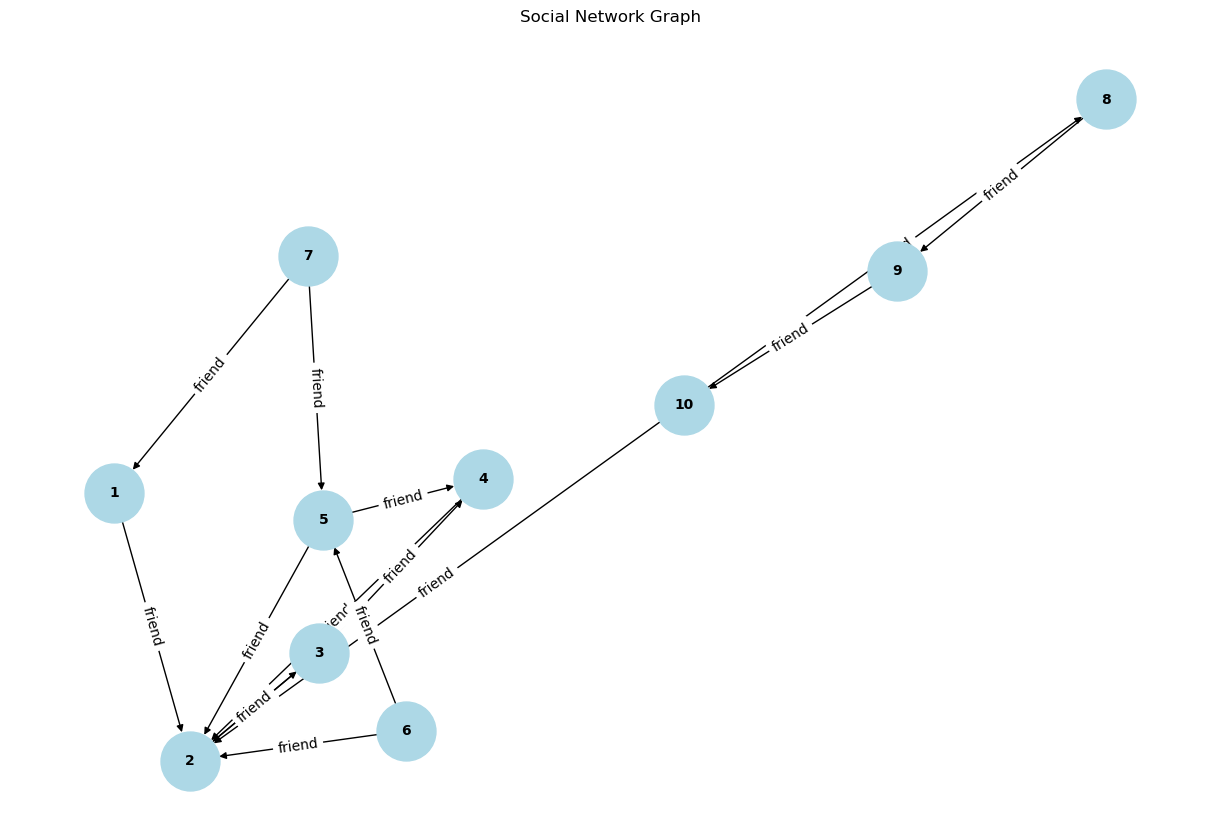

{1: 0.2222222222222222, 2: 0.7777777777777777, 3: 0.3333333333333333, 4: 0.3333333333333333, 5: 0.4444444444444444, 6: 0.2222222222222222, 7: 0.2222222222222222, 8: 0.2222222222222222, 9: 0.2222222222222222, 10: 0.3333333333333333}
{1: 0.013888888888888888, 2: 0.16666666666666666, 3: 0.06944444444444445, 4: 0.0, 5: 0.041666666666666664, 6: 0.0, 7: 0.0, 8: 0.013888888888888888, 9: 0.05555555555555555, 10: 0.09722222222222221}
{1: 0.1111111111111111, 2: 0.6923076923076923, 3: 0.42857142857142855, 4: 0.391304347826087, 5: 0.2222222222222222, 6: 0.0, 7: 0.0, 8: 0.14814814814814814, 9: 0.14814814814814814, 10: 0.14814814814814814}
{1: 0.021375000000000005, 2: 0.330345894380003, 3: 0.29579329644671476, 4: 0.15250607943392572, 5: 0.027750000000000004, 6: 0.015000000000000003, 7: 0.015000000000000003, 8: 0.038668395644247705, 9: 0.0478709914027618, 10: 0.05569034269234753}


Community 1: [1, 2, 3, 4, 5, 6, 7]


Community 2: [8, 9, 10]


In [19]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display
from networkx.algorithms import community

# Load the nodes and edges from CSV files
nodes_df = pd.read_csv('./Documents/node.csv')
edges_df = pd.read_csv('./Documents/edge.csv')

#df = pd.read_csv('./Documents/data.csv')
#node_df = df[['id','name','age']]
#edge_df = df[['source','target']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
for index, row in nodes_df.iterrows():
    G.add_node(row['id'], name=row['name'], age=row['age'])

# Add edges to the graph
for index, row in edges_df.iterrows():
    G.add_edge(row['source'], row['target'], rel=row['relationsip'])

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1800, font_size=10, font_color='black', font_weight='bold')

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G, 'rel')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Social Network Graph')
plt.show()


degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
pagerank = nx.pagerank(G)

print(degree_centrality)
print(betweenness_centrality)
print(closeness_centrality)
print(pagerank)

# Find clusters using Girvan-Newman algorithm
comp = community.girvan_newman(G)
# Get the first set of communities
first_community = next(comp)

# Print communities
for i, community in enumerate(first_community):
    print(f"\n\nCommunity {i + 1}: {list(community)}")